In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA  
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [33]:
data = pd.read_csv('diabetes.csv',sep=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [34]:
X = data[['Glucose', 'Age', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']].values
y = data['Outcome'].values
X

array([[148.   ,  50.   ,   6.   , ...,   0.   ,  33.6  ,   0.627],
       [ 85.   ,  31.   ,   1.   , ...,   0.   ,  26.6  ,   0.351],
       [183.   ,  32.   ,   8.   , ...,   0.   ,  23.3  ,   0.672],
       ...,
       [121.   ,  30.   ,   5.   , ..., 112.   ,  26.2  ,   0.245],
       [126.   ,  47.   ,   1.   , ...,   0.   ,  30.1  ,   0.349],
       [ 93.   ,  23.   ,   1.   , ...,   0.   ,  30.4  ,   0.315]])

In [35]:
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
X_std

array([[ 0.84832379,  1.4259954 ,  0.63994726, ..., -0.69289057,
         0.20401277,  0.46849198],
       [-1.12339636, -0.19067191, -0.84488505, ..., -0.69289057,
        -0.68442195, -0.36506078],
       [ 1.94372388, -0.10558415,  1.23388019, ..., -0.69289057,
        -1.10325546,  0.60439732],
       ...,
       [ 0.00330087, -0.27575966,  0.3429808 , ...,  0.27959377,
        -0.73518964, -0.68519336],
       [ 0.1597866 ,  1.17073215, -0.84488505, ..., -0.69289057,
        -0.24020459, -0.37110101],
       [-0.8730192 , -0.87137393, -0.84488505, ..., -0.69289057,
        -0.20212881, -0.47378505]])

In [36]:
nb_var=X_std.shape[1] 
nb_var

8

In [37]:
pca = PCA(n_components=8)

In [38]:
pca.fit(X_std)

PCA(n_components=8)

In [39]:
components = pca.components_
explained_variances = pca.explained_variance_ratio_

In [40]:
variances = explained_variances
for i, col in enumerate(data.columns):
    print(f"{col}: {variances[i]}")

Pregnancies: 0.2617974931611011
Glucose: 0.21640126757746503
BloodPressure: 0.12870373364801904
SkinThickness: 0.10944113047600426
Insulin: 0.09529304819389628
BMI: 0.0853285484933116
DiabetesPedigreeFunction: 0.05247702246321904
Age: 0.05055775598698364


IndexError: index 8 is out of bounds for axis 0 with size 8

In [80]:
X = data[['Pregnancies','Glucose']].values
X

array([[  6, 148],
       [  1,  85],
       [  8, 183],
       ...,
       [  5, 121],
       [  1, 126],
       [  1,  93]], dtype=int64)

In [85]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[ 0.63994726,  0.84832379],
       [-0.84488505, -1.12339636],
       [ 1.23388019,  1.94372388],
       ...,
       [ 0.3429808 ,  0.00330087],
       [-0.84488505,  0.1597866 ],
       [-0.84488505, -0.8730192 ]])

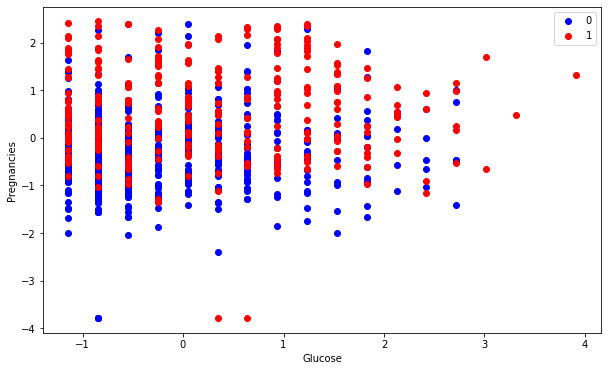

In [128]:
#Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_std[y == 0][:, 0], X_std[y == 0][:, 1], color='b', label='0')
plt.scatter(X_std[y == 1][:, 0], X_std[y == 1][:, 1], color='r', label='1')
plt.xlabel('Glucose')
plt.ylabel('Pregnancies')
plt.legend()

In [87]:
#spliting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_std, y, test_size=0.2, random_state=3)

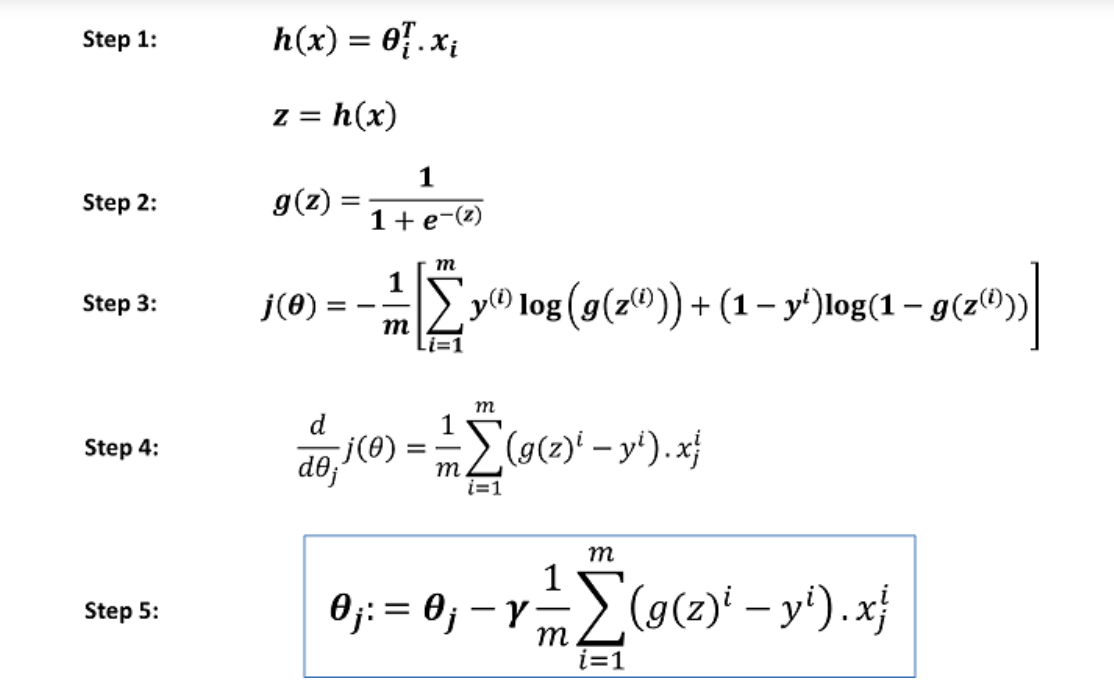

In [88]:
#Implementation de l'algorithme de la regression logistique 
class myLogisticRegression:
    
    def __init__(self, l_rate=0.001, iterations=1000):  #assign values for hyper-parameters
        self.l_rate = l_rate  #learning rate
        self.iterations = iterations  #number of iterations

    def fit(self, x, y):  #Fit the training data using Gradient Descent
        self.losses = []  # An empty list to store the error in each iteration
        self.theta = np.zeros((1 + x.shape[1]))  #intitalization,,,Array of zeros 
        n = x.shape[0]  #number of training examples 768
        
        for i in range(self.iterations):
            #Step1
            y_pred = self.theta[0] + np.dot(x, self.theta[1:])  # hypothesis h(x)
            z = y_pred
            #Step2
            g_z =  1 / (1 + np.e**(-z))  #map predicted values to probabilities between 0 & 1      
            
            #Step3
            cost = (-y * np.log(g_z) - (1 - y) * np.log(1 - g_z))/ n #cost function
            self.losses.append(cost) #Tracking losses
            
            #Step4
            d_theta1 = (1/n) * np.dot(x.T, (g_z - y)) #Derivatives of theta[1:]
            d_theta0 = (1/n) * np.sum(g_z - y)  #Derivatives of theta[0]
            
            #Step5
            self.theta[1:] = self.theta[1:] - self.l_rate * d_theta1  #upadting values of thetas using Gradient descent
            self.theta[0] = self.theta[0] - self.l_rate * d_theta0  #upadting the value of theta 0 using Gradient descent     
        return self
    
    
    def predict(self, x):  #Predicts the value after the model has been trained.
        y_pred = self.theta[0] + np.dot(x, self.theta[1:]) 
        z = y_pred
        g_z = 1 / (1 + np.e**(-z))
        return [1 if i > 0.5 else 0 for i in g_z] #Threshold  
   

In [89]:
model = myLogisticRegression()
model.fit(X_train, Y_train)


In [90]:
# print theta 0, 1, 2
print("theta_0= ", model.theta[0])
print("theta_1= ", model.theta[1])
print("theta_2= ", model.theta[2])

theta_0=  -0.14514478544803291
theta_1=  0.08830511208396381
theta_2=  0.20431838444374517


In [91]:
y_pred = model.predict(X_test)
y_pred

[0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0]

In [92]:
# Définition de la fonction pour calculer la précision (accuracy) du modèle
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

In [93]:
acc = accuracy(y_pred,Y_test)

In [94]:
print('the accuracy : ',acc)

the accuracy :  0.6883116883116883


In [ ]:
#la visualisation des classes -- the boundary decision





In [95]:
#Comparaison entre sklearn algorithme ans our algorithme (accurracy) 
from sklearn.linear_model import LogisticRegression

In [96]:
model1 = LogisticRegression()

In [97]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [98]:
y_pred = model1.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [99]:
print("the accuracy : ",accuracy(y_pred,Y_test))

the accuracy :  0.6883116883116883


In [103]:
c= model1.intercept_
c[0]

-0.8652833336482327

In [105]:
m1 = model1.coef_[0,0] 
m1

0.4301194933700603

In [107]:
m2 = model1.coef_[0,1] 
m2

1.232123954315237

In [113]:
def get_line_y(x):
    return -(c+ m1*x)/m2

In [126]:
line_x=np.arange(X_std[:,0].min(),X_std[:,0].max(),0.1)

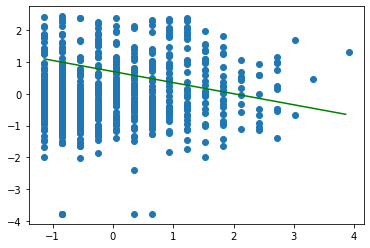

In [127]:
plt.plot(line_x,get_line_y(line_x),color='green')
plt.scatter(X_std[:,0],X_std[:,1])
